In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import datasets,model_selection

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X,y = datasets.make_blobs(centers=4,random_state=8)

In [6]:
y = y%2

In [7]:
def scatterformeplease(X,y,markers=['o','^','X'],colors=['b','r','y']):
    if len(set(y)) > len(markers) or len(set(y)) > len(colors):
        raise Exception('There are more classes than markers/colors')
    fig, ax = plt.subplots()
    for clss in np.unique(y):
        ax.scatter(X[y==clss,0],X[y==clss,1],marker=markers[clss],s=100,c=colors[clss],edgecolors='black',label=f'Class {clss}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    plt.legend()
    

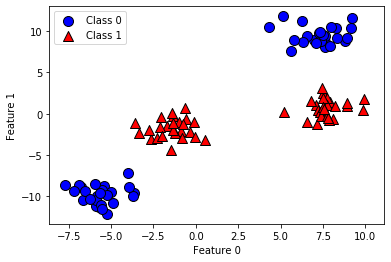

In [8]:
scatterformeplease(X,y)

In [9]:
from sklearn.svm import LinearSVC

In [10]:
X_new = np.hstack([X,X[:,1:]**2])

In [11]:
linear_svm = LinearSVC(max_iter=20000).fit(X_new,y)

In [12]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

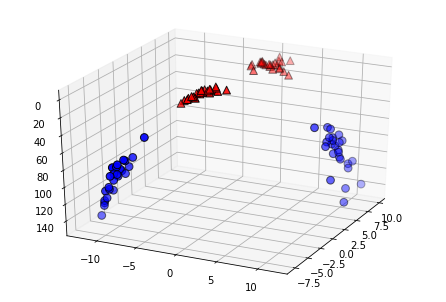

In [13]:
figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
ax.scatter(X_new[y==0,0],X_new[y==0,1],X_new[y==0,2],c='b',cmap='viridis',s=60,edgecolors='black')
ax.scatter(X_new[y==1,0],X_new[y==1,1],X_new[y==1,2],c='r',marker='^',cmap='viridis',s=60,edgecolors='black')


In [14]:
coef, intercept = linear_svm.coef_.ravel() , linear_svm.intercept_

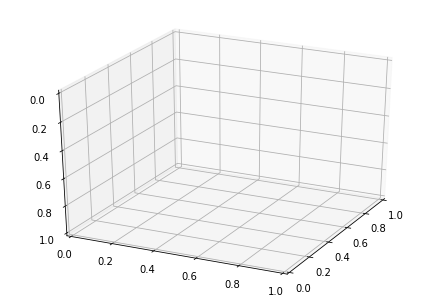

In [15]:
figure = plt.figure()
ax= Axes3D(figure,elev=-152,azim=-26)
xx= np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

In [16]:
yy

array([-14.11880698, -13.54943035, -12.98005373, -12.41067711,
       -11.84130048, -11.27192386, -10.70254724, -10.13317061,
        -9.56379399,  -8.99441737,  -8.42504075,  -7.85566412,
        -7.2862875 ,  -6.71691088,  -6.14753425,  -5.57815763,
        -5.00878101,  -4.43940438,  -3.87002776,  -3.30065114,
        -2.73127451,  -2.16189789,  -1.59252127,  -1.02314464,
        -0.45376802,   0.1156086 ,   0.68498523,   1.25436185,
         1.82373847,   2.3931151 ,   2.96249172,   3.53186834,
         4.10124497,   4.67062159,   5.23999821,   5.80937483,
         6.37875146,   6.94812808,   7.5175047 ,   8.08688133,
         8.65625795,   9.22563457,   9.7950112 ,  10.36438782,
        10.93376444,  11.50314107,  12.07251769,  12.64189431,
        13.21127094,  13.78064756])

In [17]:
XX,YY = np.meshgrid(xx,yy)

In [18]:
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]

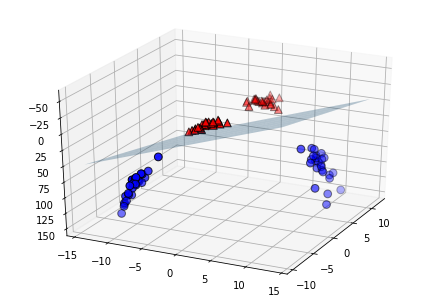

In [19]:
figure = plt.figure()
ax= Axes3D(figure,elev=-152,azim=-26)
xx= np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[y==0,0],X_new[y==0,1],X_new[y==0,2],c='b',cmap='viridis',s=60,edgecolors='black')
ax.scatter(X_new[y==1,0],X_new[y==1,1],X_new[y==1,2],c='r',marker='^',cmap='viridis',s=60,edgecolors='black')


In [20]:
from sklearn.svm import SVC

In [21]:
cancer = datasets.load_breast_cancer()

In [22]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(cancer['data'],cancer['target'],
                                                random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print(f'Accuracy on training set: {svc.score(X_train,y_train)}')
print(f'Accuracy on test set: {svc.score(X_test,y_test)}')

Accuracy on training set: 0.903755868544601
Accuracy on test set: 0.9370629370629371


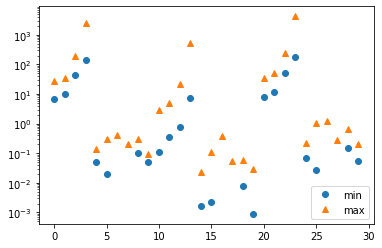

In [23]:
plt.plot(X_train.min(axis=0),'o',label='min')
plt.plot(X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.yscale('log')

In [24]:
min_on_training = X_train.min(axis=0)
range_on_training  = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training


In [25]:
X_test_scaled = (X_test - min_on_training) / range_on_training


In [26]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
print(f'Accuracy on training set: {svc.score(X_train_scaled,y_train)}')
print(f'Accuracy on test set: {svc.score(X_test_scaled,y_test)}')

Accuracy on training set: 0.9835680751173709
Accuracy on test set: 0.972027972027972


In [47]:
svc= SVC(C=30,)
svc.fit(X_train_scaled,y_train)
print(f'Accuracy on training set: {svc.score(X_train_scaled,y_train)}')
print(f'Accuracy on test set: {svc.score(X_test_scaled,y_test)}')

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.986013986013986
